# The Fashion MNIST - multiclass
Last week we worked on the Fashion MNIST problem using only two classes. This week we will work on the whole dataset and try to classify all 10 classes. This is a slightly harder problem.

You will preprocess the data to get it into the right shape to process with Keras. This includes scaling the images so that the input range is appropriate and mapping the labels to the **one-hot encoding representation**. Since you have formatted the labels to one-hot encodings we will need to use the **categorical cross entropy loss function**.

Let's load the data set:

In [1]:
library(tensorflow)
library(keras)
source("02-helpers.R")

use_multi_cpu()

data <- dataset_fashion_mnist()
data_train <- data$train
data_test <- data$test

## Exercise 1
Last week we only used two classes from the dataset, but since we are now using all of them, our dataset is larger.
How many images are in the training dataset? Inspect the dimensions of the training and test data. What do the different dimensions represent for the `x` and `y` variables inside each set?

**Hint 1:**
First inspect the contents of data_train and data_test using the [`names`](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/names) function and `dim` function.

**Hint 2:**
For our input `data_train$x`, the first axis is the number of images, the second is the height and the last axis is the width. So if we specify `data_train$x[1,1:28,1:28]` we select the first image, all the height pixels and all the width pixels, the whole image.

In [2]:
dim(data_train$x)
length(data_train$y)
dim(data_test$x)
length(data_test$y)

[1] 60000    28    28

[1] 60000

[1] 10000    28    28

[1] 10000

Let us see how our images look like, run the cell below to plot image `6001`. Feel free to change the index to plot different images from the training set.

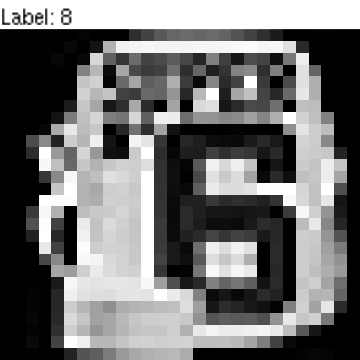

In [3]:
library(ggplot2)
library(reshape2)

index <- 6001
options(repr.plot.width = 3, repr.plot.height = 3)
ggplot(melt(t(apply(data_train$x[index,,], 2, rev)), varnames=c('x', 'y')), aes(x=x, y=y, fill=value)) +
    geom_raster() +
    scale_x_continuous(expand = c(0, 0)) +
    scale_y_continuous(expand = c(0, 0)) +
    scale_fill_gradient(low="#000000", high="#FFFFFF") +
    theme_void() +
    theme(legend.position = "none") +
    ggtitle(paste('Label:', data_train$y[index]))
options(repr.plot.width = 6, repr.plot.height = 5)

The following exercises are very similar to the exercises last week. First try to solve them without looking at the solutions from last week. If you are unable to, feel free to work from those solutions.

## Exercise 2.1
Like last week our images are pixels which are not in the range 0 to 1. Verify this be slicing out a single image from the training set and printing out the exact pixel values.

In [4]:
data_train$x[1,,]

0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,1,1,0
0,0,0,0,0,0,0,0,0,0,...,54,0,0,0,1,3,4,0,0,3
0,0,0,0,0,0,0,0,0,0,...,144,123,23,0,0,0,0,12,10,0
0,0,0,0,0,0,0,0,0,0,...,107,156,161,109,64,23,77,130,72,15
0,0,0,0,0,0,0,0,0,0,...,216,163,127,121,122,146,141,88,172,66
0,0,0,0,0,0,0,0,0,1,...,223,223,215,213,164,127,123,196,229,0
0,0,0,0,0,0,0,0,0,0,...,235,227,224,222,224,221,223,245,173,0
0,0,0,0,0,0,0,0,0,0,...,180,212,210,211,213,223,220,243,202,0


## Exercise 2.2
Now that you have seen the pixel values, rescale the **training and test datasets** so that they are in the range 0 to 1. Like last week.

**Hint**: Like last week, use R's `min` and `max` functions to find out the minimum and maximum.

In [5]:
data_train$x <- data_train$x / 255
data_test$x <- data_test$x / 255

## Exercise 2.3
Verify that you have correctly rescaled a single image by slicing out the same image as in exercise 2.1.

In [6]:
data_train$x[1,,]

0.000000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.0000000,0.0000000,0.000000000,...,0.0000000,0.000000000,0.00000000,0.0000000,0.000000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000
0.000000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.0000000,0.0000000,0.000000000,...,0.0000000,0.000000000,0.00000000,0.0000000,0.000000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000
0.000000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.0000000,0.0000000,0.000000000,...,0.0000000,0.000000000,0.00000000,0.0000000,0.000000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000
0.000000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.0000000,0.0000000,0.000000000,...,0.0000000,0.003921569,0.01568627,0.0000000,0.000000000,0.00000000,0.00000000,0.003921569,0.003921569,0.00000000
0.000000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.0000000,0.0000000,0.000000000,...,0.2117647,0.000000000,0.00000000,0.0000000,0.003921569,0.01176471,0.01568627,0.000000000,0.000000000,0.01176471
0.000000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.0000000,0.0000000,0.000000000,...,0.5647059,0.482352941,0.09019608,0.0000000,0.000000000,0.00000000,0.00000000,0.047058824,0.039215686,0.00000000
0.000000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.0000000,0.0000000,0.000000000,...,0.4196078,0.611764706,0.63137255,0.4274510,0.250980392,0.09019608,0.30196078,0.509803922,0.282352941,0.05882353
0.000000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.0000000,0.0000000,0.000000000,...,0.8470588,0.639215686,0.49803922,0.4745098,0.478431373,0.57254902,0.55294118,0.345098039,0.674509804,0.25882353
0.000000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.0000000,0.0000000,0.003921569,...,0.8745098,0.874509804,0.84313725,0.8352941,0.643137255,0.49803922,0.48235294,0.768627451,0.898039216,0.00000000
0.000000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.0000000,0.0000000,0.000000000,...,0.9215686,0.890196078,0.87843137,0.8705882,0.878431373,0.86666667,0.87450980,0.960784314,0.678431373,0.00000000
0.000000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.0000000,0.0000000,0.000000000,...,0.7058824,0.831372549,0.82352941,0.8274510,0.835294118,0.87450980,0.86274510,0.952941176,0.792156863,0.00000000


## Exercise 3.1
Now we will also need to preprocess the labels of the images. First start by displaying the first ten labels in the training set (`data_train$y`).

In [7]:
data_train$y[1:10]

[1] 9 0 0 3 0 2 7 2 5 5

## Exercise 3.2
As you see, the labels range from 0 to 9 (you can verify this if you want to by using the `max` and `min` functions on the labels). We need to convert these labels to one-hot encodings. To do this we use the Keras helper function [`to_categorical()`](https://www.rdocumentation.org/packages/keras/versions/2.2.4/topics/to_categorical). Notice that we have made [`to_categorical()`](https://www.rdocumentation.org/packages/keras/versions/2.2.4/topics/to_categorical) a clickable link which will direct you to the documentation of that function. Use the documentation to guide you in using the function.

Apply this function to the **training and test dataset labels** and store the output in `data_train$y` and `data_test$y`, respectively (overwriting the old values).

If you want additional quick reading about categorical variables and one-hot encodings see [here](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/). 

In [8]:
data_train$y = to_categorical(y = data_train$y, num_classes = 10)
data_test$y = to_categorical(y = data_test$y, num_classes = 10)

## Exercise 3.3
Verify that you have done this correctly by
- Displaying the `dim` of the new labels. We have changed each label to a vector, so we should have more dimensions.
- Displaying the first ten rows of the labels in the training set (same as in exercise 3.1 but now we have more dimensions). See if they make sense.

In [9]:
dim(data_train$y)
dim(data_test$y)
data_train$y[1:10, ]

[1] 60000    10

[1] 10000    10

0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0
0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0
0,0,0,0,0,1,0,0,0,0


## Exercise 4.1
Divide the original training data 80%-20% between the new training and validation set. Make sure that you slice both the images and the labels. If you are copying from the previous week, be careful that now our `y`s have an extra dimension.

In [10]:
index <- 0.8 * dim(data_train$y)[1]
x_val <- data_train$x[-(1:index),,]
y_val <- data_train$y[-(1:index),]

x_train <- data_train$x[1:index,,]
y_train <- data_train$y[1:index,]

## Exercise 4.2
Verify the dimensions of the two sets using `dim`. They should be
- 12000 28 28 for the validation inputs
- 12000 10 for the validation one-hot encodings
- 48000 28 28 for the training inputs
- 48000 10 for the training one-hot encodings

In [11]:
dim(x_val)
dim(y_val)

dim(x_train)
dim(y_train)

[1] 12000    28    28

[1] 12000    10

[1] 48000    28    28

[1] 48000    10

## Exercise 5
Create an initial model by filling out the skeleton below. Apply the following in this order.
- Flatten the input, convert the two-dimensional 28 x 28 image into a one-dimensional vector of length 784.
- Add a dense layer with 256 units.
- Add a dense layer with 10 units and softmax activation. The output.

The functions you will need to use.
- `layer_flatten()`, accepts parameters `input_shape`
- `layer_dense()`, accepts parameters `units`, `activation`

Values for parameters.
- `activation`, accepts `"relu"`, `"sigmoid"`, `"softmax"`

Print a summary of the model and verify the output shapes of each layer.

In [12]:
model <- keras_model_sequential() %>%
    layer_flatten(input_shape = c(28, 28)) %>%
    layer_dense(units = 256, activation = "relu") %>%
    layer_dense(units = 10, activation = "softmax")

model

Model
Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten (Flatten)                   (None, 784)                     0           
________________________________________________________________________________
dense (Dense)                       (None, 256)                     200960      
________________________________________________________________________________
dense_1 (Dense)                     (None, 10)                      2570        
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
________________________________________________________________________________



## Exercise 6
Compile the model by filling out the skeleton below according to the following requirements:
1. The optimizer should be `optimizer_adam` with learning rate 0.001
1. The loss should be `categorical_crossentropy`
1. The metric should be accuracy (warning: Keras expects a character vector)

**Hint**: it may help to keep the previous notebook open for reference.

In [13]:
model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "categorical_crossentropy",
    metrics = c("accuracy")
)
weights <- get_weights(model)  # We will use the initial weights later

## Exercise 7
Fit the model and plot the training history by filling out the skeleton below. We supply the validation set as well so we can see if we start overfitting.

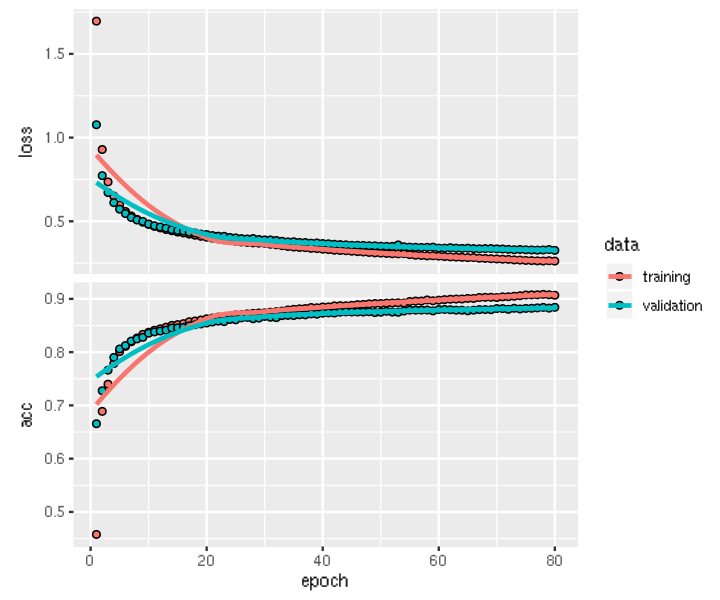

In [14]:
model %>% set_weights(weights)  # this will make sure we reset the model to its initial weights
history <- model %>% fit(
    x = x_train,
    y = y_train,
    epochs = 80,
    validation_data = list(x_val, y_val),
    batch_size = 8096,
    callbacks=list(Progress$new())
)
plot(history)

## Exercise 8
We can see that we seem to be able to fit the data alright using this network, our training loss continues to go down, but slowly. At the same time we can see the validation and training accuracy starting to diverge. This is an indication that we might be beginning to overfit. That is to say, we have stopped training this network at the correct moment.

We can still imporove this network by adjusting the layers in hopes to reduce the number of parameters. Try reducing the units in the first layer by half (and possibly more) and add smaller additional layers, with ever decreasing number of units. This will speed up the training time as we are using less parameters and might perform equally well.

Model: "sequential_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten_1 (Flatten)                 (None, 784)                     0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 128)                     100480      
________________________________________________________________________________
dense_3 (Dense)                     (None, 64)                      8256        
________________________________________________________________________________
dense_4 (Dense)                     (None, 64)                      4160        
________________________________________________________________________________
dense_5 (Dense)                     (None, 32)                      2080        
________________________________________________________________________________
dense_

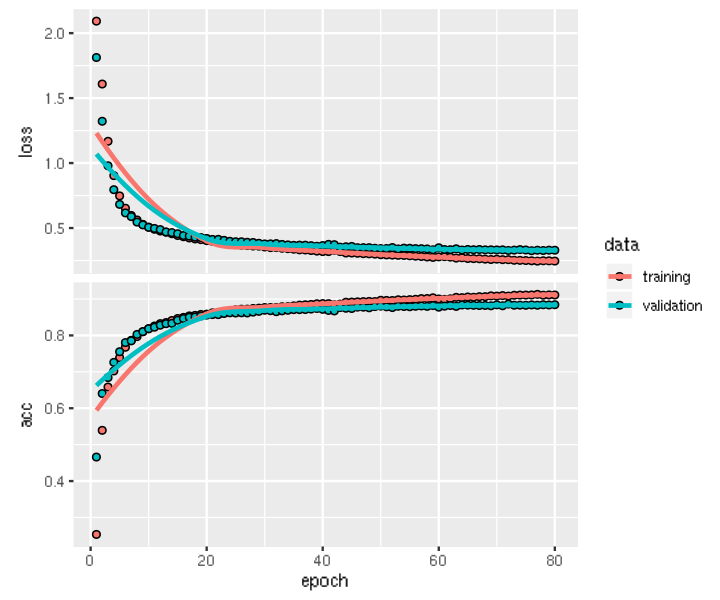

In [15]:
model <- keras_model_sequential() %>%
    layer_flatten(input_shape = c(28, 28)) %>%
    layer_dense(units = 128, activation = "relu") %>%
    layer_dense(units = 64, activation = "relu") %>%
    layer_dense(units = 64, activation = "relu") %>%
    layer_dense(units = 32, activation = "relu") %>%
    layer_dense(units = 10, activation = "softmax")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "categorical_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = x_train,
    y = y_train,
    validation_data = list(x_val, y_val),
    epochs = 80,
    batch_size = 8096,
    callbacks=list(Progress$new())
)
plot(history)

When you are ok with the performance of your model [`evaluate`](https://tensorflow.rstudio.com/keras/reference/evaluate.html) it on the test set to obtain a final estimate of our model's performance.

In [16]:
x_test <- data_test$x
y_test <- data_test$y
model %>% evaluate(x_test, y_test)

$loss
[1] 0.3567913

$acc
[1] 0.8717